# Redes neuronales convolutivas

http://cs231n.github.io/convolutional-networks/

Las redes neuronales convolutivas son muy similares a las redes neuronales ordinarias. Están formadas por neuronas que tienen pesos y bias que se pueden aprender. Cada neurona recibe entradas, realiza un producto escalar al que, opcionalmente, le sigue una función no lineal. Toda la red sigue siendo una función diferenciable: desde los píxeles de imagen sin procesar en un extremo hasta los porcentajes de clase en el otro.
Entonces, ¿qué cambia? Las arquitecturas de redes convolutivas suponen explícitamente que las entradas son imágenes, lo que nos permite codificar ciertas propiedades en la arquitectura.



## Un poco de historia

### Santiago Ramón y Cajal

Santiago ramón y Cajal resume en este dibujo todas las clases importantes de células presentes en la retina. Muestra también varias de sus capas estructurales. En tiempos de Cajal era sabido que la luz que llega a la retina activa neuronas fotosensibles (fotorreceptores), localizadas en las capas B, C y D. Estas neuronas convierten la luz en señales eléctricas. Cajal infirió que estas señales son transmitidas a través de contactos (sinapsis) a neuronas en la capa F (células bipolares) y, después, a un tercer tipo de neuronas en la capa H (células ganglionales), las cuales transmiten la información de la retina al cerebro. Otras neuronas en la capa F (células horizontales y amacrinas) contribuyen a los primemos pasos en el proceso de la información visual incluso antes de que la información llegue al cerebro.

<img src="images/ryc.jpg">

<img src="images/4ef20e2c6f3790e3f7503ae047183338.jpg">

### David Hubel y Torsten Wiesel

https://www.youtube.com/watch?v=RSNofraG8ZE

En 1959, los neurofisiólogos de Harvard David H. Hubel y Torsten Wiesel insertaron un microelectrodo en la corteza visual primaria de un gato anestesiado. Luego proyectaron patrones de luz y oscuridad en una pantalla frente al gato, y encontraron que algunas neuronas se activaban rápidamente cuando se les presentaban líneas en un determinado ángulo, mientras que otras respondían mejor a otro ángulo. Llamaron a estas neuronas "células simples". Otras neuronas, que denominaron "células complejas", respondieron mejor a las líneas de cierto ángulo que se movían en una dirección. Estos estudios mostraron cómo el sistema visual construye una imagen a partir de estímulos simples en representaciones más complejas. Muchas redes neuronales artificiales, componentes fundamentales del aprendizaje profundo, pueden verse como modelos en cascada de tipos de células inspirados en las observaciones de Hubel y Wiesel.

<img src="images/_Wiesel_and_Hubel_big.jpg">
Wiesel (izq) y Hubel (der).


## La convolución

En este dominio, la convolución (2D) es una función que realiza el siguiente cómputo:

$$ conv(p_{x,y}) = \sum_{j=-1}^{1} \sum_{i=-1}^{1} p_{x+i,y+j} \cdot k_{i, j}$$

<img src="images/conv.jpg">

(355, 474)


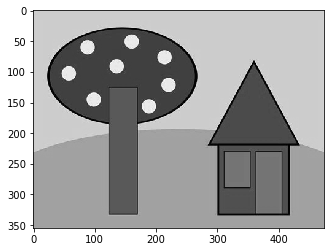

In [30]:
from matplotlib.pyplot import imshow
 import numpy as np
from PIL import Image

%matplotlib inline
pil_im = Image.open('images/dibujo.jpg', 'r').convert('L')
image = np.asarray(pil_im)
print(image.shape)
imshow(image, cmap='gray')

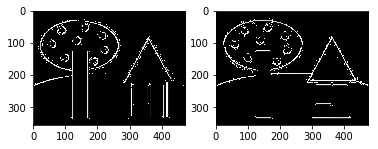

In [38]:
from matplotlib import pyplot as plt

kernel1 = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
kernel2 = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])

def convolution(image, kernel):
    res_image = np.zeros_like(image)
    for y in range(1, image.shape[0]-1):
        for x in range(1, image.shape[1]-1):
            r = 0.0
            for j in range(kernel.shape[0]):
                for i in range(kernel.shape[1]):
                    r += image[y+j-1, x+i-1] * kernel[j, i]
            res_image[y, x] = int(r/9)
    return res_image

plt.subplot(1,2,1)
imshow(convolution(image, kernel1), cmap='gray')
plt.subplot(1,2,2)
imshow(convolution(image, kernel2), cmap='gray')
plt.show()


## Maxpooling

Es común insertar periódicamente una capa *maxpooling* entre capas convolutivas sucesivas. Su función es reducir progresivamente el tamaño espacial de la representación para reducir la cantidad de parámetros y el cálculo en la red y, por lo tanto, también controlar el sobreajuste.

<img src="images/maxpool.jpg">